In [66]:
#importation des bibliothéque
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
#importation des données de HR_SBA_Software :
tab=pd.read_csv('C:\\Users\\salma\\HR_SBA_Software.csv')
display(tab)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [67]:
#suppression des deux colonnes sales et salary :  
tab.drop(axis='columns',columns=['sales','salary'],inplace=True)
tab

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


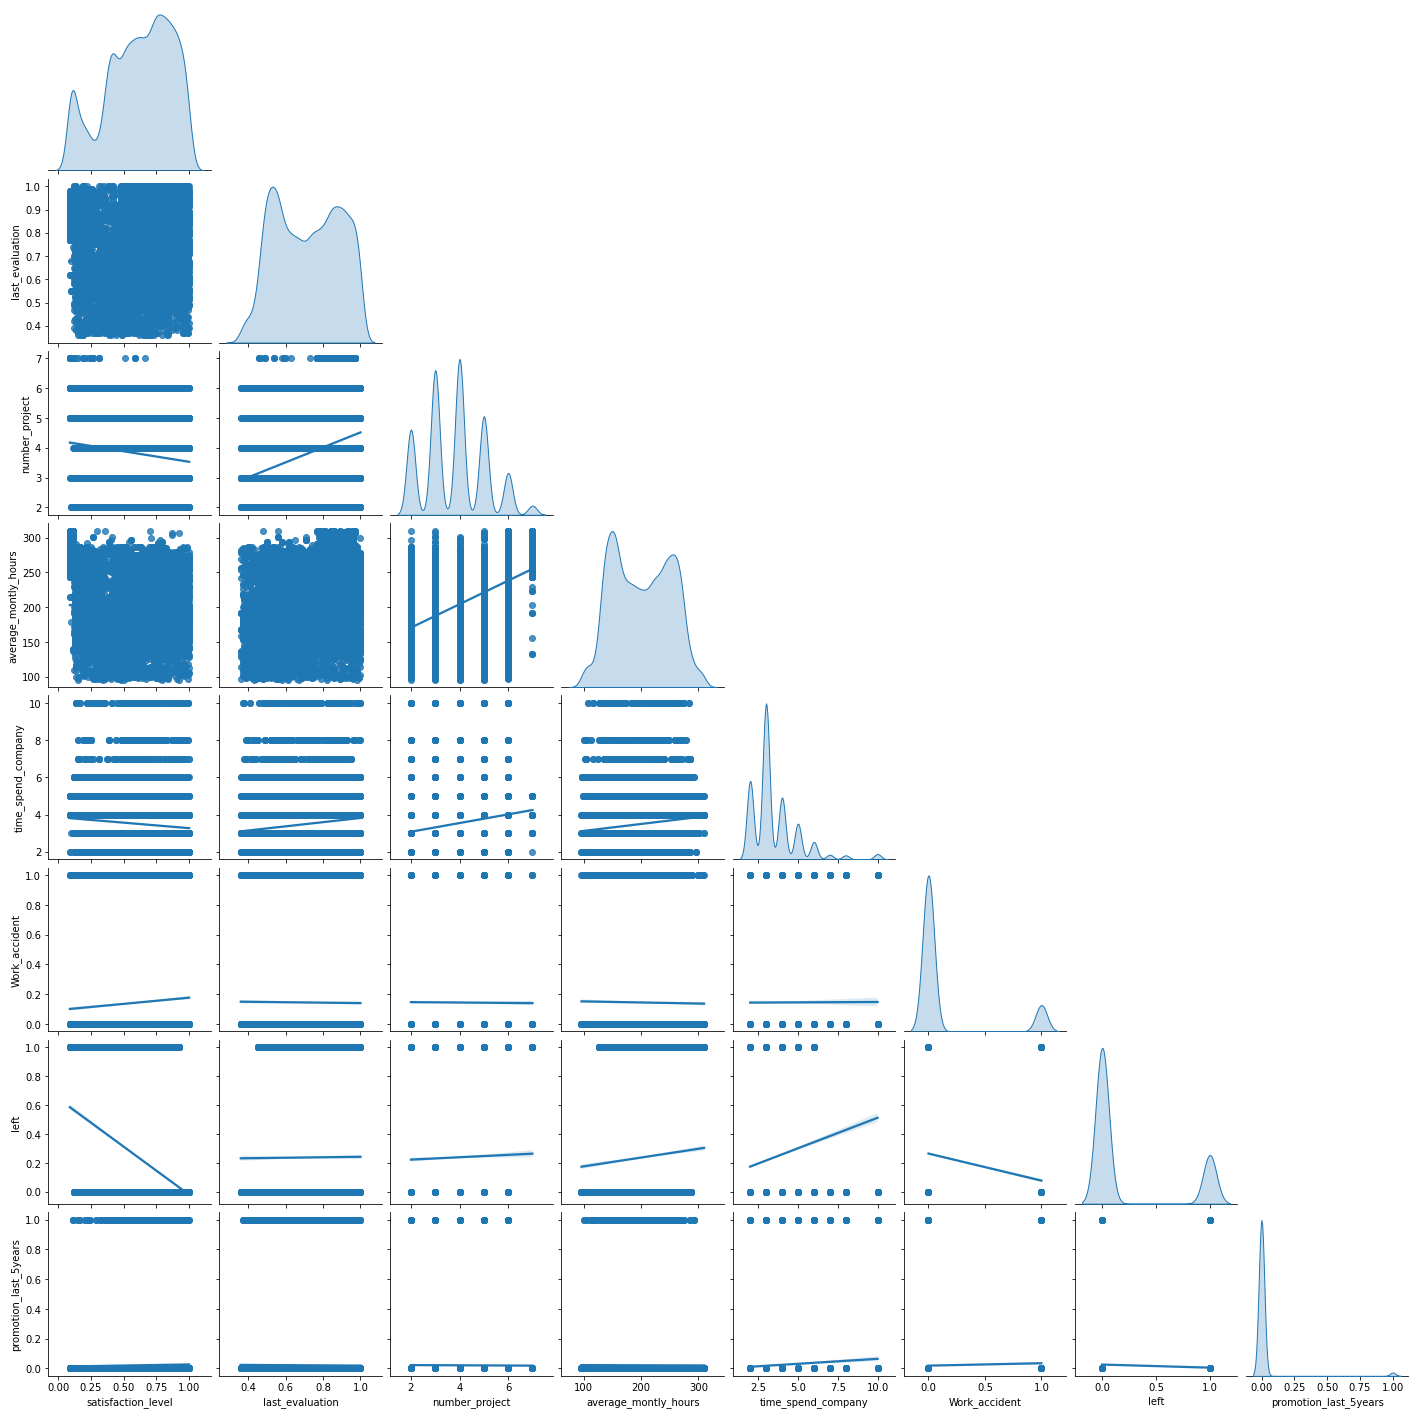

In [96]:
import seaborn as sns
sns.pairplot(tab,corner=True,kind='reg',diag_kind='kde')

In [68]:
#preparation des données pour l'ACP : remplaces les valeurs inconnues par la moyenne de variable
tab=tab.fillna(tab.mean())
tab

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [69]:
#pourcentage de la variance expliqué parr chacune des composantes
X=tab.values
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [70]:
sc = preprocessing.StandardScaler()
#transformation et centrage des données de la matrice tab :
Z= sc.fit_transform(tab)
print(Z)

[[-0.93649469 -1.08727529 -1.46286291 ... -0.41116529  1.788917
  -0.14741182]
 [ 0.75281433  0.84070693  0.97111292 ... -0.41116529  1.788917
  -0.14741182]
 [-2.02247906  0.95755433  2.59376348 ... -0.41116529  1.788917
  -0.14741182]
 ...
 [-0.97671633 -1.08727529 -1.46286291 ... -0.41116529  1.788917
  -0.14741182]
 [-2.02247906  1.42494396  1.7824382  ... -0.41116529  1.788917
  -0.14741182]
 [-0.97671633 -1.14569899 -1.46286291 ... -0.41116529  1.788917
  -0.14741182]]


In [71]:
#transformation de NaN ou de Na avec des valeurs spécifiques
Y = tab.fillna(tab.mean(),inplace=True)
display(tab)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [72]:
#calcule de moyenne des colonnes de tableau
moy=np.mean(Z,axis=0)
print(moy)

[ 0. -0.  0. -0. -0.  0. -0.  0.]


In [73]:
#calcule de ecartype des colonnes de tableau
ecart=np.std(Z,axis=0)
print(ecart)

[1. 1. 1. 1. 1. 1. 1. 1.]


In [74]:
#calculs des composantes principales :
from sklearn.decomposition import PCA
pca=PCA()
#modéle d'ACP :
pc=pca.fit(tab)
print(pca.n_components_)

8


In [75]:
from sklearn import preprocessing
Y=preprocessing.scale(tab, axis=0, with_mean=True,with_std=True)
display(Y)
ydf=pd.DataFrame(Y,columns=tab.columns)
ydf

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
         1.788917  , -0.14741182],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
         1.788917  , -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182]])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1.788917,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1.788917,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1.788917,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1.788917,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1.788917,-0.147412
...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,1.788917,-0.147412
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,1.788917,-0.147412
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,1.788917,-0.147412
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,1.788917,-0.147412


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


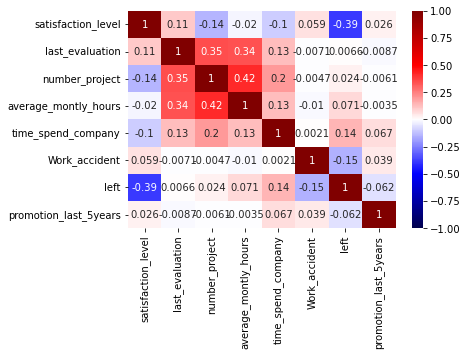

In [76]:
#representation de matrice de tel facon chaque valeur est représenter par un couleur :
c=ydf.corr()
from seaborn import *
heatmap(c,xticklabels=ydf.columns,yticklabels=ydf.columns,vmin=-1,vmax=1,center=0,cmap="seismic",annot=True)
c

In [77]:
from seaborn import *
from numpy import *
import numpy as np
#retourne une copie de matrice de type boolean symétrique par rapport au diagonale :
print(triu(ones(c.shape),k=1).astype(bool))
#génere les indice de données d'entrées avec selon les conditions utilises
up_c=c.where(np.triu(np.ones(c.shape),k=1).astype(bool))
up_c

[[False  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True]
 [False False False  True  True  True  True  True]
 [False False False False  True  True  True  True]
 [False False False False False  True  True  True]
 [False False False False False False  True  True]
 [False False False False False False False  True]
 [False False False False False False False False]]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,NaN,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,NaN,NaN,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,NaN,NaN,NaN,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,NaN,NaN,NaN,NaN,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,NaN,NaN,NaN,NaN,NaN,0.002120,0.144822,0.067433
Work_accident,NaN,NaN,NaN,NaN,NaN,NaN,-0.154622,0.039245
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061788
promotion_last_5years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
p_c=tab.unstack().dropna()
print(p_c)
s_p=p_c.sort_values()
s_p

satisfaction_level     0        0.38
                       1        0.80
                       2        0.11
                       3        0.72
                       4        0.37
                                ... 
promotion_last_5years  14994    0.00
                       14995    0.00
                       14996    0.00
                       14997    0.00
                       14998    0.00
Length: 119992, dtype: float64


promotion_last_5years  14998      0.0
left                   3011       0.0
                       3010       0.0
                       3009       0.0
                       3008       0.0
                                ...  
average_montly_hours   803      310.0
                       809      310.0
                       1482     310.0
                       1963     310.0
                       1545     310.0
Length: 119992, dtype: float64

In [79]:
#Nombre de composantes calculés
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit(ydf)
print(pca.n_components_)

8


In [80]:
u=pc.transform(Y)
col=['pca_%i' % i for i in range(ydf.shape[1])]
udf=pd.DataFrame(u,columns=col)
udf

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,-1.304221,-2.440874,-0.029929,0.035555,-0.082205,0.855035,-0.289710,0.042588
1,2.416479,-0.378320,0.063442,0.491090,1.224608,0.840279,-0.845506,0.940520
2,3.548439,-1.634946,-0.202433,-0.425381,-1.106754,-0.318148,0.401293,0.537367
3,1.865397,-0.615025,-0.114473,0.393668,0.779375,0.884429,-0.092655,1.074762
4,-1.302636,-2.476430,-0.019425,0.018854,-0.109116,0.815628,-0.338900,0.025797
...,...,...,...,...,...,...,...,...
14994,-1.274266,-2.340427,-0.064761,0.081485,-0.010670,0.994001,-0.098430,0.056442
14995,-1.400461,-2.545822,0.015032,-0.005475,-0.129315,0.693959,-0.481358,0.083629
14996,-1.443936,-2.515388,0.007723,0.028742,-0.024123,0.838873,-0.075755,0.107807
14997,3.397386,-1.559837,-0.283544,-0.299156,-0.963942,0.313784,0.345747,-0.117288


In [81]:
np.set_printoptions(suppress=True)
#print(udf.corr())
print(np.corrcoef(udf,rowvar=False))

[[ 1.  0.  0. -0.  0. -0. -0. -0.]
 [ 0.  1. -0.  0.  0. -0. -0.  0.]
 [ 0. -0.  1. -0.  0. -0. -0. -0.]
 [-0.  0. -0.  1. -0. -0. -0.  0.]
 [ 0.  0.  0. -0.  1. -0.  0.  0.]
 [-0. -0. -0. -0. -0.  1.  0. -0.]
 [-0. -0. -0. -0.  0.  0.  1. -0.]
 [-0.  0. -0.  0.  0. -0. -0.  1.]]


In [82]:
nb=pca.explained_variance_
n=ydf.shape[0]
vprop=(n-1)/n*nb
vprop

array([1.86091589, 1.46409354, 1.06058666, 0.95598374, 0.8454993 ,
       0.7089809 , 0.62648811, 0.47745185])

In [83]:
print(sum(vprop))

8.000000000000004


In [84]:
print(pca.explained_variance_)
print(pca.explained_variance_.sum())

[1.86103997 1.46419116 1.06065738 0.95604748 0.84555567 0.70902817
 0.62652988 0.47748369]
8.00053340445393


In [85]:
display(udf.cov())
display(np.diag(pd.DataFrame(np.cov(udf,rowvar=0,ddof=0))))

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
pca_0,1.861040e+00,3.242876e-16,1.948923e-16,-3.093642e-16,1.913391e-16,-4.228293e-17,-3.727294e-16,4.737583e-18
pca_1,3.242876e-16,1.464191e+00,-1.409431e-17,1.249241e-16,1.837590e-16,-1.610778e-17,-1.219928e-16,1.938264e-16
pca_2,1.948923e-16,-1.409431e-17,1.060657e+00,-1.662063e-15,6.777113e-16,-2.567178e-17,-2.112296e-16,-3.179233e-16
pca_3,-3.093642e-16,1.249241e-16,-1.662063e-15,9.560475e-01,-1.871049e-16,-3.011326e-16,-9.826784e-17,5.321342e-16
pca_4,1.913391e-16,1.837590e-16,6.777113e-16,-1.871049e-16,8.455557e-01,-2.950330e-16,6.434230e-16,4.630988e-17
pca_5,-4.228293e-17,-1.610778e-17,-2.567178e-17,-3.011326e-16,-2.950330e-16,7.090282e-01,2.174551e-16,-3.517656e-17
pca_6,-3.727294e-16,-1.219928e-16,-2.112296e-16,-9.826784e-17,6.434230e-16,2.174551e-16,6.265299e-01,-5.341625e-17
pca_7,4.737583e-18,1.938264e-16,-3.179233e-16,5.321342e-16,4.630988e-17,-3.517656e-17,-5.341625e-17,4.774837e-01


array([1.86091589, 1.46409354, 1.06058666, 0.95598374, 0.8454993 ,
       0.7089809 , 0.62648811, 0.47745185])

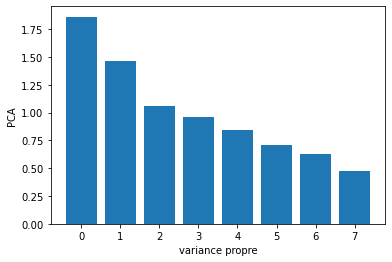

In [86]:
import matplotlib.pyplot as plt
plt.bar(range(pca.n_components_),vprop)
plt.xlabel("variance propre")
plt.ylabel("PCA")
plt.show()


In [87]:
varcum=np.cumsum(vprop)
print(varcum)

[1.86091589 3.32500943 4.38559609 5.34157984 6.18707913 6.89606004
 7.52254815 8.        ]


In [88]:
pca.explained_variance_ratio_*100

array([23.26144862, 18.30116922, 13.25733329, 11.9497968 , 10.56874124,
        8.86226128,  7.83110138,  5.96814816])

Text(0, 0.5, 'variance cumulée')

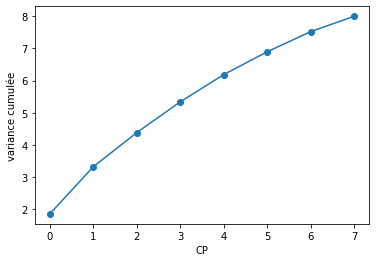

In [89]:
plt.plot(range(pca.n_components_),varcum,'o-')
plt.xlabel("CP")
plt.ylabel("variance cumulée")

In [90]:
np.diag(udf.cov(ddof=0))

array([1.86091589, 1.46409354, 1.06058666, 0.95598374, 0.8454993 ,
       0.7089809 , 0.62648811, 0.47745185])

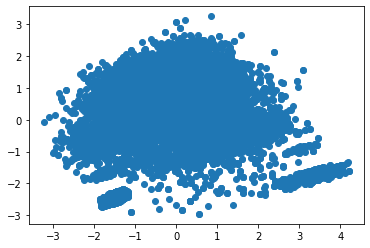

In [91]:
#affichage de nuage des points :
plt.scatter(udf.iloc[:,0],udf.iloc[:,1])
plt.show()

In [92]:
Q=pca.components_
Q_df=pd.DataFrame(Q,columns=udf.columns,index=col)
display(Q_df)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
pca_0,-0.189562,0.463637,0.557047,0.525596,0.333951,-0.064439,0.216339,-0.008709
pca_1,0.608258,0.312229,0.122543,0.178537,-0.117093,0.281404,-0.616313,0.113589
pca_2,-0.145790,-0.157159,-0.012952,-0.113398,0.444157,0.425776,-0.010696,0.749896
pca_3,0.253499,0.103072,-0.098583,-0.012068,0.045699,-0.813157,-0.008162,0.501868
pca_4,0.322683,0.064712,-0.188794,-0.253492,0.793030,-0.065493,-0.013648,-0.398012
pca_5,0.243330,0.522578,-0.473351,0.022742,-0.160136,0.253129,0.583922,0.111544
pca_6,-0.291022,0.547773,0.241577,-0.721474,-0.093148,-0.029385,-0.162191,0.022835
pca_7,0.510436,-0.273678,0.588840,-0.305890,-0.110384,0.070164,0.453562,0.037805


In [93]:
p=udf.shape[1]
R=np.zeros((p,p))
for i in range(p):
    R[:,i]=Q[i,:]*np.sqrt(vprop[i])
R_df=pd.DataFrame(R,columns=col,index=udf.columns)
display(R_df)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
pca_0,-0.258592,0.735991,-0.150141,0.247857,0.296711,0.204886,-0.230347,0.352700
pca_1,0.632472,0.377796,-0.161850,0.100779,0.059503,0.440016,0.433568,-0.189106
pca_2,0.759898,0.148277,-0.013339,-0.096389,-0.173598,-0.398566,0.191210,0.406876
pca_3,0.716994,0.216029,-0.116783,-0.011800,-0.233089,0.019149,-0.571054,-0.211363
pca_4,0.455561,-0.141682,0.457414,0.044682,0.729200,-0.134836,-0.073727,-0.076273
pca_5,-0.087905,0.340499,0.438485,-0.795059,-0.060221,0.213137,-0.023259,0.048482
pca_6,0.295120,-0.745737,-0.011016,-0.007980,-0.012549,0.491668,-0.128376,0.313401
pca_7,-0.011880,0.137443,0.772279,0.490698,-0.365976,0.093921,0.018074,0.026122


In [94]:
display(pd.DataFrame({'id':udf.columns,'CP1':R[:,0],'CP2':R[:,1],}))

,id,CP1,CP2
0,pca_0,-0.258592,0.735991
1,pca_1,0.632472,0.377796
2,pca_2,0.759898,0.148277
3,pca_3,0.716994,0.216029
4,pca_4,0.455561,-0.141682
5,pca_5,-0.087905,0.340499
6,pca_6,0.295120,-0.745737
7,pca_7,-0.011880,0.137443
